# <center> R2.08 - Statistique descriptive <br> Régression linéaire et données MySQL </center>

<center> 2021 / 2022 - A. Ridard </center>

L'objectif est d'illustrer la section 3 du cours 2 avec Python, mais aussi l'importation de données à partir d'une base MySQL.

In [2]:
# importation des packages
import numpy as np
import pandas as pd

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps
import mysql.connector

> Charger dans un DataFrame les lignes de la table **ZoneHumide** vérifiant zh_profondeur renseignée et zh_surface < 40.

In [3]:
# on commence par créer une connexion à la base de données

### cela suppose évidemment d'avoir créé au préalable la bd et l'utilisateur, mais aussi d'avoir créé et rempli les tables
### je vous conseille d'utiliser le shell pour exécuter les scripts de création et de remplissge disponibles sur Moodle

cnx = mysql.connector.connect(user='pnr', password='mdp_pnr', host='127.0.0.1', database='bd_pnr')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete = """
SELECT * 
FROM ZoneHumide
WHERE zh_profondeur IS NOT NULL
AND zh_surface < 40
"""
            
df = pd.read_sql_query(ma_requete, cnx)

# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

# on affiche le DataFrame
df

('aobserve',)
('chouette',)
('lieu',)
('lieu_vegetation',)
('nid_gci',)
('obs_batracien',)
('obs_chouette',)
('obs_gci',)
('obs_hippocampe',)
('obs_loutre',)
('observateur',)
('observation',)
('vegetation',)
('zonehumide',)


,zh_id,zh_temporaire,zh_profondeur,zh_surface,zh_typeMare,zh_pente,zh_ouverture
0,2,1,15.0,20.0,None,Abrupte,Abritee
1,3,1,40.0,25.0,None,Douce,None
2,8,1,50.0,4.0,None,None,Abritee
3,9,0,50.0,4.0,None,Raide,Abritee
4,13,0,70.0,20.0,Mare,Douce,Ouverte
5,14,0,60.0,8.0,None,Douce,Abritee
6,19,0,40.0,30.0,Mare,Douce,None
7,20,1,5.0,20.0,None,Douce,None
8,21,1,50.0,2.0,None,Raide,None
9,25,1,30.0,20.0,None,Abrupte,Abritee


> - Représenter le nuage de points entre la profondeur et la surface ainsi que la droite d'ajustement
> - Enregistrer la représentation graphique obtenue au format .png
> - Indiquer le coefficient de détermination

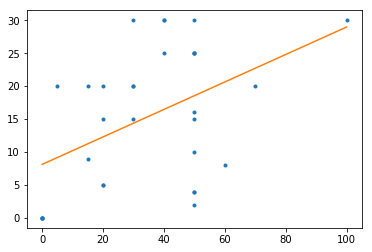

Coefficient de détermination : 0.211189076006


In [4]:
# on représente le nuage de points
abs = df["zh_profondeur"]
ord = df["zh_surface"]
plt.plot(abs, ord, '.')

# on "calcule" la régression linéaire et on représente la droite d'ajustement
a, b, r, _, _ = sps.linregress(abs, ord)
x = np.linspace(abs.min(), abs.max(), 100)
plt.plot(x, a*x+b)

# on enregistre la figure (dans le répertoire du notebook)
plt.savefig("image")

# on affiche la figure
plt.show()

# on affiche le coefficient de détermination
print("Coefficient de détermination :", r**2)

# comme on pouvait déjà le voir avec le nuage de points, ce modèle n'est effectivement pas pertinent ! 